In [52]:
import pandas as pd  
import numpy as np   
import sklearn       
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [38]:
##IMPORTING THE DATA
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)
print(diabetes_y.shape)


(442, 10)
(442,)


In [35]:
##CONVERTING THE DATA INTO DATA FRAME TO LOOK INTO THE BIGGER PICTURE
df_diabetes_X = pd.DataFrame(diabetes_X)
df_diabetes_X.columns = ['age','sex','body_mass_index','average_blood_pressure','total_serum_cholesterol','low_density_lipoproteins','high_density_lipoproteins','total_cholesterol','possibly_log_serum_triglycerides_level','blood_sugar_level']

df_diabetes_y = pd.DataFrame(diabetes_y)
df_diabetes_y.columns = ['disease_progression_after_year']

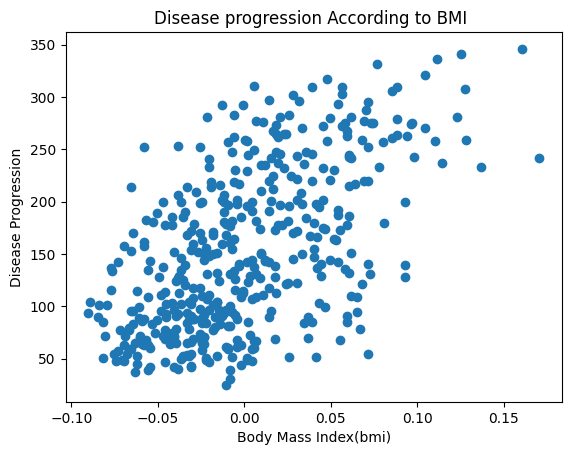

In [46]:
##VISUALIZING THE DATA FOR BETTER ANALYZING
plt.scatter(df_diabetes_X['body_mass_index'], df_diabetes_y['disease_progression_after_year'])
plt.xlabel("Body Mass Index(bmi)")
plt.ylabel("Disease Progression")
plt.title("Disease progression According to BMI ")
plt.show()

It can be infered from the plot that Disease progression among majority of people is lowest  
having BMI's <= 0

In [48]:
diabetes = pd.DataFrame(diabetes_X,columns = ['age','sex','body_mass_index','average_blood_pressure','total_serum_cholesterol','low_density_lipoproteins','high_density_lipoproteins','total_cholesterol','possibly_log_serum_triglycerides_level','blood_sugar_level'])
diabetes['disease_progression_after_year'] = pd.DataFrame(diabetes_y)

X = diabetes[['body_mass_index']]
y = diabetes[['disease_progression_after_year']]


In [54]:
##SPLITTING THE DATA INTO TRAINING AND TESTING WITH RATIO 7:3
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(309, 1)
(133, 1)
(309, 1)
(133, 1)


In [53]:
##TRAINING A LINEAR REGRESSION MODEL ON THE ABOVE DATA
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Disease Progression (Training Data)')

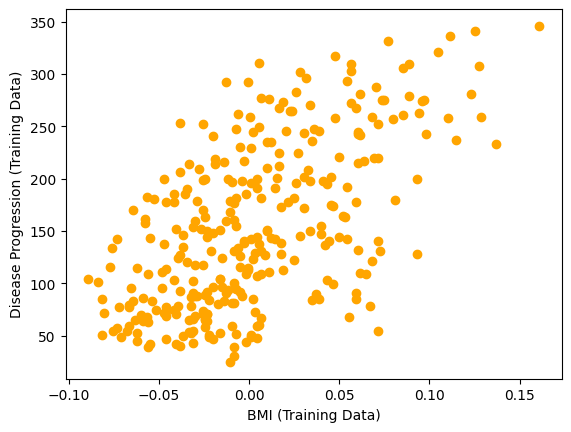

In [74]:
plt.scatter(X_train, y_train, color='Orange')
plt.xlabel("BMI (Training Data)")
plt.ylabel("Disease Progression (Training Data)")

In [57]:
##Here Independent variable becomes x which is BMI
##whereas dependent variable becomes y which is disease progression

# THE COFFICIENTS OF THE MODEL ARE
print('Coefficients:', model.coef_)

print('intercept:', model.intercept_)

Coefficients: [[988.41931249]]
intercept: [151.04202449]


In [60]:
##PREDICTION USING TEST DATA
y_pred = model.predict(X_test)

In [62]:
##LOSS FUNCTIONS (MSE and MAE) of the Model is

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

print('Mean absolute error:', mean_absolute_error(y_test, y_pred)) 


Mean squared error: 3884.94
Mean absolute error: 50.59307504375872


FITTING THE MODEL WITH THE TEST DATA AND SHOWING WITH MODEL

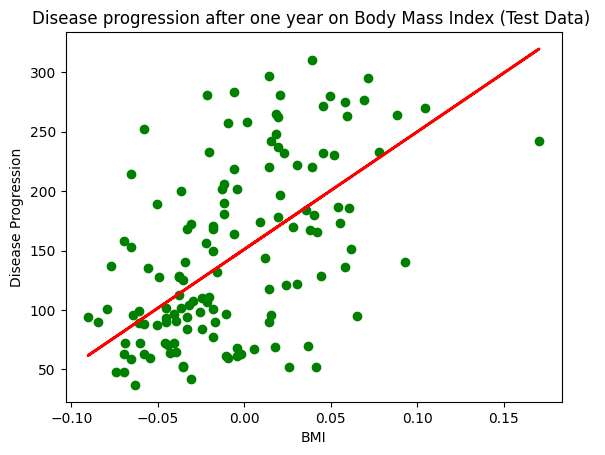

In [69]:
plt.scatter(X_test['body_mass_index'], y_test,  color='green')
plt.plot(X_test['body_mass_index'], y_pred_test, color='red', linewidth=2)
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Disease progression after one year on Body Mass Index (Test Data) ")
plt.show()

In [70]:
print('Accuracy of model is', model.score(X,y))


Accuracy of model is 0.3431430288953802


AS ACCURACY OF THE MODEL IS 34% SO IT MAY NOT BE THE BEST MODEL IN CAPTURING RELATIONSHIPS WHEN MULTI PREDICTORS ARE INVOLVED